1. 데이터 가져오기
    + sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    + diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [218]:
from sklearn.datasets import load_diabetes
# 데이터셋 가져오기
diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target

print(df_X.shape)

(442, 10)


In [137]:
import pandas as pd
import numpy as np
# print("컬럼 목록 : ",diabetes.feature_names)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


2. 모델에 입력할 데이터 X 준비하기
    + df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [215]:
df_X = np.array(df_X)

3. 모델에 예측할 데이터 y 준비하기
    + df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [216]:
df_y = np.array(df_y)

4. train 데이터와 test 데이터로 분리하기
    + X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [234]:
from sklearn.model_selection import train_test_split
# test_size는 훈련집합과 테스트집합의 비율로(0.8:0.2)을 의미
# random_state는 랜덤으로 훈련집합과 테스트집합을 나누기 때문에 반복 수행마다 
#   달라지는 것을 방지하기  위한 랜덤의 seed번호이다. 
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y,test_size=0.2,random_state=41)

print('훈렵집합과 테스트집합의 입력값의 shape\n',X_train.shape,X_test.shape)
print('훈렵집합과 테스트집합의 정답(label)값의 shape\n',y_train.shape,y_test.shape)

훈렵집합과 테스트집합의 입력값의 shape
 (353, 10) (89, 10)
훈렵집합과 테스트집합의 정답(label)값의 shape
 (353,) (89,)


5. 모델 준비하기
    + 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    + 모델 함수를 구현해주세요.

In [235]:
# 입력데이터의 컬럼이 10개이고 정답데이터의 컬럼이 1개이 때문에
W = np.random.rand(X_train.shape[1])
b = np.random.rand(1)

def model(x,w,b):
    pred = 0
    for i in range(w.shape[0]):
        pred += x[:,i]*w[i]
    pred += b
    return pred

6. 손실함수 loss 정의하기
    + 손실함수를 MSE 함수로 정의해주세요.

In [236]:
# mean square error
def MSE(a, b):
    return ((a - b)**2).mean()

7. 기울기를 구하는 gradient 함수 구현하기
    + 기울기를 계산하는 gradient 함수를 구현해주세요

$$\frac{\partial L}{\partial W}=\frac{1}{N}\sum_{i=1}^N 2x_i(\hat{y_{i}}-y_i)$$
$$\frac{\partial L}{\partial b}=\frac{1}{N}\sum_{i=1}^N 2(\hat{y_{i}}-y_i)$$

In [238]:
def gradient(x, w, b, y):
    N = len(y)
    y_pred = model(x, w, b)
    
    dW = 1/N * 2 * x.T.dot(y_pred - y) # 데이터들의 합은 행렬곱으로 진행됨
    db = 2 * (y_pred - y).mean()
    return dW, db

8. 하이퍼 파라미터인 학습률 설정하기
    + 학습률, learning rate 를 설정해주세요
    + 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [244]:
lr = 0.5

9. 모델 학습하기
    + 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    + loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    + 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [245]:
losses_save = []
iter_n = 5001

# def remake_input(x):
#     new_input = np.delete(x,1,axis=1)*100
#     return new_input
    
# X_train_remake = remake_input(X_train)
# X_test_remake = remake_input(X_test)

# W = np.random.rand(X_train_remake.shape[1])
# b = np.random.rand(1)

for i in range(1, iter_n):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    
    y_pred = model(X_train,W,b)
    L = MSE(y_pred,y_train)
    losses_save.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
print(W,b)

Iteration 100 : Loss 3972.3613
Iteration 200 : Loss 3452.9576
Iteration 300 : Loss 3238.8869
Iteration 400 : Loss 3121.5323
Iteration 500 : Loss 3049.3962
Iteration 600 : Loss 3003.3202
Iteration 700 : Loss 2973.4348
Iteration 800 : Loss 2953.8647
Iteration 900 : Loss 2940.9381
Iteration 1000 : Loss 2932.3201
Iteration 1100 : Loss 2926.5140
Iteration 1200 : Loss 2922.5548
Iteration 1300 : Loss 2919.8167
Iteration 1400 : Loss 2917.8917
Iteration 1500 : Loss 2916.5124
Iteration 1600 : Loss 2915.5024
Iteration 1700 : Loss 2914.7445
Iteration 1800 : Loss 2914.1603
Iteration 1900 : Loss 2913.6972
Iteration 2000 : Loss 2913.3193
Iteration 2100 : Loss 2913.0019
Iteration 2200 : Loss 2912.7282
Iteration 2300 : Loss 2912.4861
Iteration 2400 : Loss 2912.2674
Iteration 2500 : Loss 2912.0661
Iteration 2600 : Loss 2911.8779
Iteration 2700 : Loss 2911.6996
Iteration 2800 : Loss 2911.5290
Iteration 2900 : Loss 2911.3644
Iteration 3000 : Loss 2911.2045
Iteration 3100 : Loss 2911.0483
Iteration 3200 : 

10. test 데이터에 대한 성능 확인하기
    + test 데이터에 대한 성능을 확인해주세요.

In [246]:
test_pred = model(X_test, W, b)
test_mse = MSE(test_pred,y_test)

print("test데이터의 MSE값은 : ",test_mse)

test데이터의 MSE값은 :  2839.6002175602803


11. 정답 데이터와 예측한 데이터 시각화하기
    + x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

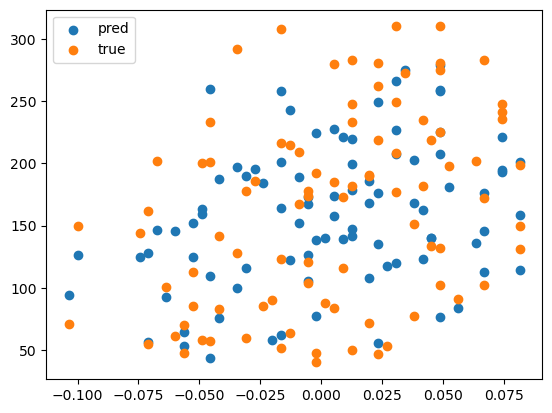

In [256]:
import matplotlib.pyplot as plt
x = np.linspace(-0.1,0.1,10)
plt.scatter(X_test[:,0], test_pred, label="pred")
plt.scatter(X_test[:,0], y_test, label="true")
plt.legend()
plt.show()

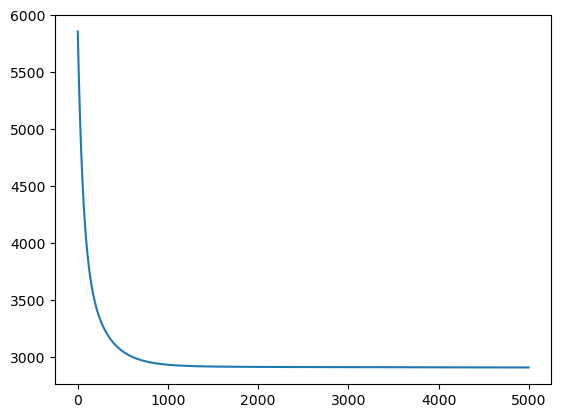

In [257]:
plt.plot(losses_save)
plt.show()